# Tutorial 3: Imágenes Médicas y representación estadística de una imagen

En este tercer tutorial accederemos a imágenes médicas almacenadas en archivos con formatos especiales para este fin, exploraremos sus metadatos asociados, y visualizaremos dichas imágenes de forma adecuada. En la primera parte de este tutorial analizaremos radiografías toráxicas almacenadas en archivos de formato DICOM, en la segunda parte analizaremos imágenes de resonancia magnética cerebrales con distintos medios de contraste, almacenadas en archivos de formato NIfTI y en la última parte analizaremos la representación estadística de una imagen además realizaremos un ejercicio de ecualización donde veremos como se afecta la imagen y su representación estadística.

## Primera Parte: Radiografías Toráxicas

En la carpeta `chest_radiographies` encontrará un pequeño subconjunto de la base de datos asociada al *SIIM-FISABIO-RSNA COVID-19 Detection Challenge*, publicado por la Sociedad para la Informática de Imágenes en Medicina (SIIM), la Fundación para la Promoción de la Salud y la Investigación Biomédica de Valencia (FISABIO) y la Sociedad Radiológica de Norteamércia (RSNA). Esta base de datos se emplea para entrenar modelos que resuelvan la tarea de detección y clasificación de anormalidades debidas al COVID en radiografías toráxicas. Puede acceder al reto publicado en la plataforma Kaggle a través de [este link](https://www.kaggle.com/c/siim-covid19-detection/overview).

Note que cada radiografía de esta base de datos se encuentra almacenada en una ruta que sigue la forma `estudio/serie/imagen`, donde cada directorio y archivo está nombrado con un código alfanumérico empleado para identificar a cada paciente de forma anónima. Para extraer todas las rutas de los archivos con terminación `.dcm` (asociada a archivos de formato DICOM) sin conocer todos los códigos alfanuméricos existentes podemos utilizar las funciones de la librería `glob`:


In [2]:
import os
from glob import glob

paths = glob('chest_radiographies/*/*/*.dcm')

print('La lista de rutas con terminación .nii desde el directorio base es:')
paths

La lista de rutas con terminación .nii desde el directorio base es:


['chest_radiographies\\000c9c05fd14\\e555410bd2cd\\51759b5579bc.dcm',
 'chest_radiographies\\00a76543ed93\\4a223cccbe04\\ad8d4a5ba8f0.dcm',
 'chest_radiographies\\00a87235ca36\\b7a93187765f\\09cf9767a7bf.dcm',
 'chest_radiographies\\00b33b3eb8d9\\6c8b814c685b\\12a2dfb55b6f.dcm',
 'chest_radiographies\\00c83e33588f\\2892280fbaaf\\7e7d3afebf5d.dcm']

[DICOM](https://www.dicomstandard.org/) (Digital Imaging and Communications in Medicine) es el estándar internacional para transmitir, acceder, imprimir, almacenar y visualizar imágenes médicas e información asociada. Este estándar define el formato que siguen las imágenes médicas para intercambiar datos con la calidad requerida en un contexto médico, y este formato es empleado para almacenar radiografías, tomografías computarizadas (CT), imágenes de resonancia magnética (MRI), ultrasonidos, entre otros. Para acceder a archivos en formato DICOM desde Python podemos emplear las funciones de la librería `pydicom`. El siguiente fragmento de código se encarga de descargar dicha librería en este Kernel de Jupyter Notebooks. Para descargarlo en su equipo puede ejecutar los comandos `conda install -c conda-forge pydicom` o `pip install pydicom` en su consola según su preferencia.

In [3]:
# Instala la librería pydicom (Puede durar un rato ejecutándose)(puede comentarlo en caso de ya instalarla)
import sys

try:
    import pydicom as dicom
except:
    !conda install -c conda-forge --yes --prefix {sys.prefix} pydicom 
    import pydicom as dicom

# Si presenta problemas puede acercarse al asistente graduado

In [4]:
# Otras librerias a utilizar 
import matplotlib.pyplot as plt # Matplotlib para graficar
import numpy as np # Numpy para manejar arreglos
from pydicom.pixel_data_handlers.util import apply_voi_lut # Para aplicar la transformación de datos originales en archivos formato DICOM a arreglos
from mpl_toolkits.mplot3d import Axes3D # Para graficar en 3D
from skimage.io import imread # Para leer imágenes
from skimage.color import rgb2gray # Para convertir imágenes a escala de grises
from skimage.exposure import equalize_hist

En la siguiente celda se emplea la función `dcmread` de esta librería para leer los datos almacenados en el archivo asociado a la primera ruta de la lista obtenida anteriormente:

In [5]:
example = dicom.dcmread(paths[0])
example

c:\Users\User\AppData\Local\Programs\Python\Python313\Lib\site-packages\pydicom\valuerep.py:440: UserWarning: Invalid value for VR UI: '71228e4340de'. Please see <https://dicom.nema.org/medical/dicom/current/output/html/part05.html#table_6.2-1> for allowed values for each VR.
  warn_and_log(msg)
c:\Users\User\AppData\Local\Programs\Python\Python313\Lib\site-packages\pydicom\valuerep.py:440: UserWarning: Invalid value for VR UI: '51759b5579bc'. Please see <https://dicom.nema.org/medical/dicom/current/output/html/part05.html#table_6.2-1> for allowed values for each VR.
  warn_and_log(msg)
c:\Users\User\AppData\Local\Programs\Python\Python313\Lib\site-packages\pydicom\valuerep.py:440: UserWarning: Invalid value for VR UI: '000c9c05fd14'. Please see <https://dicom.nema.org/medical/dicom/current/output/html/part05.html#table_6.2-1> for allowed values for each VR.
  warn_and_log(msg)
c:\Users\User\AppData\Local\Programs\Python\Python313\Lib\site-packages\pydicom\valuerep.py:440: UserWarning:

Dataset.file_meta -------------------------------
(0002,0002) Media Storage SOP Class UID         UI: Digital X-Ray Image Storage - For Presentation
(0002,0003) Media Storage SOP Instance UID      UI: 1.2.840.113654.2.70.1.9822815699402501441770223933240180074
(0002,0010) Transfer Syntax UID                 UI: Explicit VR Little Endian
-------------------------------------------------
(0008,0005) Specific Character Set              CS: 'ISO_IR 100'
(0008,0008) Image Type                          CS: ['DERIVED', 'PRIMARY', '']
(0008,0016) SOP Class UID                       UI: 71228e4340de
(0008,0018) SOP Instance UID                    UI: 51759b5579bc
(0008,0020) Study Date                          DA: '96fc21dd2b1f'
(0008,0030) Study Time                          TM: '13e700cac7f0'
(0008,0050) Accession Number                    SH: '0dc10cf540cf'
(0008,0060) Modality                            CS: 'DX'
(0009,0010) Private Creator                     LO: 'GEIIS'
(0010,0010) Patient

Podemos identificar que este archivo contiene metadatos asociados al paciente, como su sexo y un ID asociado, e información importante para la correcta visualización del archivo, como el valor de `Imager Pixel Spacing`.

La librería `pydicom` le asocia a la clase con la que representa los archivos un método `dir` que enlista la forma en la que podemos acceder a varios atributos que representan a los metadatos:

In [6]:
example.dir()

['AccessionNumber',
 'BitsAllocated',
 'BitsStored',
 'BodyPartExamined',
 'Columns',
 'DeidentificationMethod',
 'DeidentificationMethodCodeSequence',
 'HighBit',
 'ImageType',
 'ImagerPixelSpacing',
 'InstanceNumber',
 'Modality',
 'PatientID',
 'PatientName',
 'PatientSex',
 'PhotometricInterpretation',
 'PixelData',
 'PixelRepresentation',
 'Rows',
 'SOPClassUID',
 'SOPInstanceUID',
 'SamplesPerPixel',
 'SeriesInstanceUID',
 'SeriesNumber',
 'SpecificCharacterSet',
 'StudyDate',
 'StudyID',
 'StudyInstanceUID',
 'StudyTime']

In [7]:
print('El sexo del primer paciente es: ' + str(example.PatientSex))
print('El ID del estudio es: ' + str(example.StudyID))

El sexo del primer paciente es: M
El ID del estudio es: 55625fb42f3f


Para acceder al arreglo de píxeles asociados a la imagen en escala de grises de la radiografía se utiliza el atributo `pixel_array`:

(np.float64(-0.5), np.float64(2849.5), np.float64(3092.5), np.float64(-0.5))

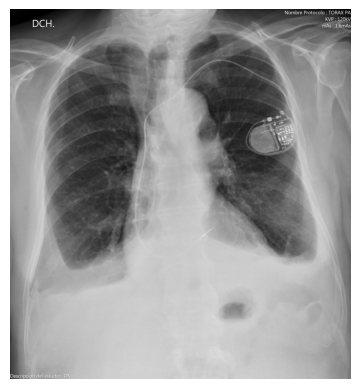

In [17]:
img = example.pixel_array
plt.figure()
plt.imshow(img, cmap = 'gray')
plt.axis('Off')

Obtengamos una visualización de las 5 radiografías disponibles empleando las funciones previamente implementadas:

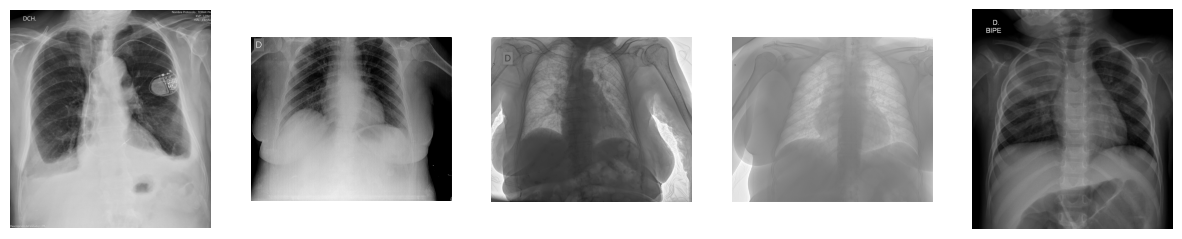

In [8]:
plt.figure(figsize=(15,8))
for i in range(len(paths)):
    dcm = dicom.dcmread(paths[i])
    img = dcm.pixel_array
    plt.subplot(1, len(paths), i+1)
    plt.imshow(img, cmap = 'gray')
    plt.axis('Off')

Teniendo en cuenta las intensidades asociadas a la escala de Housfield, no tiene sentido que en algunas de estas radiografías el tejido de algunos órganos circundantes al pulmón tenga intensidades bajas, mientras que el pulmón tiene intensidades altas. Se deben tener en cuenta varias posibles correcciones que se deben aplicar al arreglo de intensidades original para que la radiografía se visualice como se espera. Estas correcciones son:

1. Es posible que los metadatos indiquen que se debe aplicar una función no lineal para escalar las intensidades ([VOI LUT](https://dicom.innolitics.com/ciods/digital-x-ray-image/voi-lut/00281056)).
1. El metadato de [interpretación fotométrica](https://dicom.innolitics.com/ciods/digital-x-ray-image/image-pixel/00280004) puede hacer que la escala de intensidades esté invertida con respecto a lo esperado.
1. En algunos casos los datos pueden ser normalizados linealmente para asociarles un rango de intensidades determinado. **Nota:** Esta base de datos no cuenta con los metadatos "RescaleSlope" y "RescaleIntercept", pero estos definen una transformación lineal que puede llevar los datos originales a una escala interpretable como la de Hounsfield. Esto puede ser aprovecharse en algunas tareas como la segmentación según tipos de tejido. 

## **Ejercicio 1**: 
La ultima parte de este procedimiento es hacer el reescalamiento de las intensidades para que estén todas entre 0 y 1. Por esto, haremos una función que nos permita pasar las intensidades de cualquier rango en el que estén al rango [0,1].

La formula para realizar el reescalamiento de un píxel es la siguiente: $\frac{I - MIN_i}{MAX_i - MIN_i}$, Donde $I$ es la intensidad de un píxel cualquiera en la imagen, $MAX_i$ es la intensidad máxima en la imagen y $MIN_i$ es la intensidad mínima en la imagen.

> - Nota: recuerde que puede hacer opeaciones sobre toda la matriz de forma simultanea, no es necesario hacer recorridos para alterar o buscar valores especificos.

In [9]:
def range_reescaling(img):
    img = img.astype(np.float32)

    min_val = img.min()
    max_val = img.max()
    
    # (I - MIN) / (MAX - MIN)
    new_img = (img - min_val) / (max_val - min_val)
    return new_img

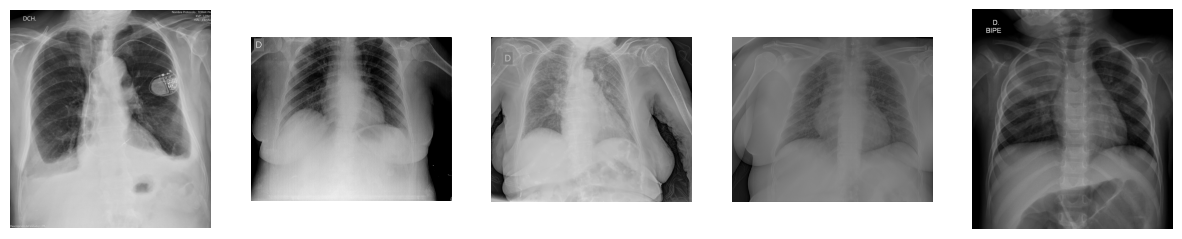

In [10]:
# Definimos una función para la correcta transformación de datos originales en archivos formato DICOM a arreglos
# que representan las radiografías de intensidades adecuadas.

def dcm_to_img(path):
    # Se lee el archivo DICOM asociado a la ruta que recibe como parámetro
    dcm = dicom.dcmread(path)
    # Se extrae el arreglo que representa la radiografía
    img = dcm.pixel_array
    # Se aplica la transformación no lineal VOI LUT indicada en los metadatos
    img = apply_voi_lut(img, dcm)
    # Se invierte la escala de intensidades si el parámetro de intensidad fotométrica así lo indica
    img = np.amax(img) - img if dcm.PhotometricInterpretation == "MONOCHROME1" else img
    # Se normalizan linealmente las intensidades para estar entre 0 y 1.
    img = range_reescaling(img)
    # Se retorna la imagen extraida y corregida a partir del archivo DICOM
    return img
    
# Se genera una visualización de las 5 radiografías disponibles en los datos dados
plt.figure(figsize=(15,8))
for i in range(len(paths)):
    img = dcm_to_img(paths[i])
    assert(np.isclose(np.min(img),0,0.01))
    assert(np.isclose(np.max(img),1,0.01))
    plt.subplot(1, len(paths), i+1)
    plt.imshow(img, cmap = 'gray')
    plt.axis('Off')


A la hora de trabajar con grandes bases de datos nos gustaría acceder a nuestras imágenes y su información asociada de forma sencilla, ordenada e iterable. Con base en esto, a continuación se presenta una implementación que obtiene una *lista de diccionarios*, donde cada diccionario representa una radiografía y tiene llaves asociadas al estudio, la serie y la imagen indicada en las rutas de los archivos provistos: 

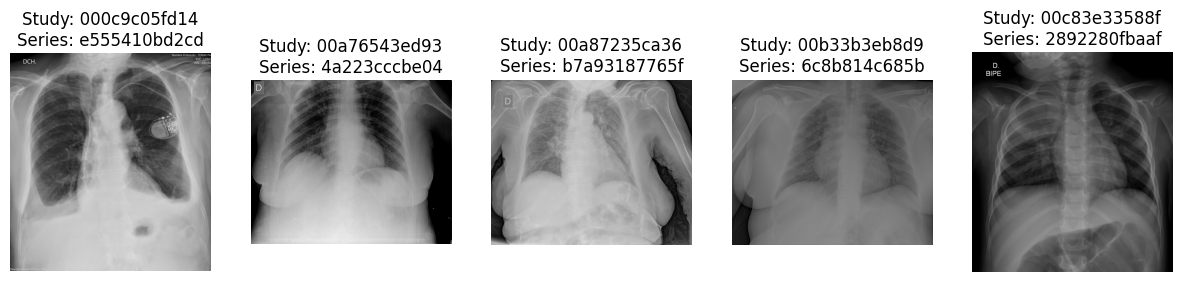

In [11]:
dataset = []

for path in paths:
    
    # Se crean listas a partir de separar las rutas por el caracter '\' y se usan para extraer el código
    # alfanumérico del estudio y la serie
    
    path_split = path.split(os.path.sep)
    study = path_split[1]
    series = path_split[2]
    
    # Se carga la imágen empleando la función implementada anteriormente
    
    image = dcm_to_img(path)
    path_dict = {'study':study, 'series':series, 'image':image}
    dataset.append(path_dict)

plt.figure(figsize=(15,8))

plot = 1
for data in dataset:
    plt.subplot(1, len(dataset), plot)
    plt.title("Study: " + data['study'] + "\n"
              "Series: " + data['series'])
    plt.imshow(data['image'], cmap = 'gray')
    plt.axis('Off')
    plot += 1
    

## Segunda Parte: Imágenes de Resonancia Magnética

En la carpeta `brain_MRIs` encontrará un pequeño subconjunto de la base de datos asociada al *Brain Tumor Segmentation (BrATS) Challenge 2020*. Esta base de datos se emplea para entrenar modelos que resuelvan la tarea de segmentar distintas regiones de tumores en imágenes de resonancia magnética multiparamétricas. En esta base de datos, cada paciente tiene una carpeta asociada, la cual contiene 4 imágenes de resonancia magnética con distintos medios de contraste y unas anotaciones de las distintas regiones del tumor realizadas por un panel de expertos. Las 4 imágenes de resonancia magnética corresponden a:

1. Un escáner con medio de contraste T1 nativo
1. Un escáner con medio de contraste T1 post-contraste con Gadolinio
1. Un escáner con medio de contraste T2 nativo
1. Un escáner con medio de contraste T2 con Recuperación de Inversión Atenuada por Fluido (FLAIR).


Estas imágenes de resonancia magnética se encuentran almacenadas en archivos de formato [NIfTI](https://nifti.nimh.nih.gov/) (Neuroimaging Informatics Technology Initiative), el cual es un formato común para almacenar imágenes neurológicas además del formato DICOM. La librería `nibabel` nos permite acceder e interactuar con estos archivos a través de Python. En las siguientes celdas de código descargaremos esta librería y la emplearemos para acceder a los archivos de la base de datos de *BrATS*.

In [13]:
# Instala la librería nibabel (Puede durar un rato ejecutándose) (puede comentarlo en caso de ya instalarla)

# Si desea instalarlo en su computador recuerde ejecutar los comandos 'conda install -c conda-forge nibabel' y
# 'pip install nibabel' en su consola según su preferencia.
try:
    import nibabel as nib
except:
    !conda install -c conda-forge --yes --prefix {sys.prefix} nibabel
    import nibabel as nib

# Si presenta problemas puede acercarse al asistente graduado

In [14]:
# Se crean listas con las rutas a los archivos NIfTI separados por medio de contraste.
paths_t1 = glob('brain_MRIs/*/*t1.nii.gz')
paths_t1ce = glob('brain_MRIs/*/*t1ce.nii.gz')
paths_t2 = glob('brain_MRIs/*/*t2.nii.gz')
paths_flair = glob('brain_MRIs/*/*flair.nii.gz')
paths_seg = glob('brain_MRIs/*/*seg.nii.gz')

# Se cargan los archivos asociados a dichas rutas como elementos de listas

nii_t1 = [nib.load(path) for path in paths_t1]
nii_t1ce = [nib.load(path) for path in paths_t1ce]
nii_t2 = [nib.load(path) for path in paths_t2]
nii_flair = [nib.load(path) for path in paths_flair]
nii_seg = [nib.load(path) for path in paths_seg]

Podemos acceder a los metadatos del archivo a través del atributo `header`:

In [15]:
example = nii_t1[0]
header_example = example.header
print(header_example)

<class 'nibabel.nifti1.Nifti1Header'> object, endian='<'
sizeof_hdr      : 348
data_type       : np.bytes_(b'')
db_name         : np.bytes_(b'')
extents         : 0
session_error   : 0
regular         : np.bytes_(b'r')
dim_info        : 0
dim             : [  3 240 240 155   1   1   1   1]
intent_p1       : 0.0
intent_p2       : 0.0
intent_p3       : 0.0
intent_code     : none
datatype        : int16
bitpix          : 16
slice_start     : 0
pixdim          : [1. 1. 1. 1. 0. 0. 0. 0.]
vox_offset      : 0.0
scl_slope       : nan
scl_inter       : nan
slice_end       : 0
slice_code      : unknown
xyzt_units      : 2
cal_max         : 0.0
cal_min         : 0.0
slice_duration  : 0.0
toffset         : 0.0
glmax           : 0
glmin           : 0
descrip         : np.bytes_(b'')
aux_file        : np.bytes_(b'')
qform_code      : scanner
sform_code      : scanner
quatern_b       : 0.0
quatern_c       : 0.0
quatern_d       : 1.0
qoffset_x       : 0.0
qoffset_y       : 239.0
qoffset_z       : 0.0

Por otro lado, podemos obtener el arreglo de voxels que representa a la imagen de resonancia magnética a través del método ` get_fdata()`:

In [16]:
data_example = range_reescaling(example.get_fdata())
print("Las dimensiones del arreglo son: " + str(data_example.shape))
print("El tipo de dato que contiene al arreglo es: " + str(type(data_example)))

Las dimensiones del arreglo son: (240, 240, 155)
El tipo de dato que contiene al arreglo es: <class 'numpy.ndarray'>


Note que la imagen de resonancia magnética es representada por un arreglo de 3 dimensiones, por lo que no es posible visualizarlo como una imagen 2D.

Sin embargo, podemos imaginar ese arreglo de 3 dimensiones como un cubo. Ahora, si tomamos proyecciones en 2D de ese volumen podemos visualizar partes del cubo.

Para visualizar mejor esta idea generemos un cubo y veamos como serían esos cortes o proyecciones.

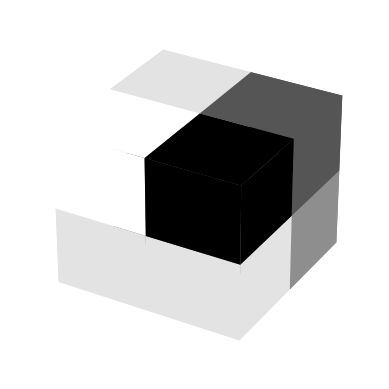

In [17]:
np.random.seed(3)
array = np.random.randint(0,10,(2,2,2))

fig = plt.figure()
ax = fig.add_subplot(projection = '3d')

cmap = plt.get_cmap("gray")
norm= plt.Normalize(np.min(array), np.max(array))
ax.voxels(np.ones_like(array), facecolors=cmap(norm(array)),shade = False)
ax.axis('off')

plt.show()

Generamos un cubo de $2\times2\times2$. También podemos visualizar este volumen en su forma de arreglo de la siguiente manera.

In [18]:
print(array)
print(f"\nTenemos una lista con las siguientes dimensiones: {array.shape}")

[[[8 9]
  [3 8]]

 [[8 0]
  [5 3]]]

Tenemos una lista con las siguientes dimensiones: (2, 2, 2)


Como lo podemos observar ya no tenemos un arreglo de arreglos como en el caso de las imágenes 2D, sino que tenemos un arreglo de arreglos de arreglos. Podemos observar que la indexación en este caso se puede hacer en los tres ejes de la siguiente manera: $array[...,...,...]$. Entonces, si la indexación la hacemos en un solo eje la dimensionalidad se va a reducir en 1 por lo que podremos obtener un arreglo en 2D equivalente a una imagen:

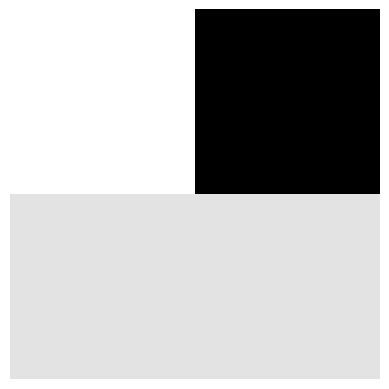

In [19]:
# La functión rot90 realiza una rotación de 90 grados que es necesaria
# debido a que la orientación de el cubo está distorcionada.
plt.imshow(np.rot90(array[:,0]), cmap='gray')
plt.axis('off')
plt.show()

Note que en este corte hicimos la indexación en el segundo eje y podemos observar la cara frontal del cubo. Siguiendo este principio podemos utilizar los diferentes ejes para realizar diferentes cortes al cubo y observar diferentes perspectivas en este. En la siguiente imagen podemos observar la representación de los ejes:

![Imagen array](arrays.png)


Ahora, haremos una función que extraiga el corte que se especifique para cada eje en el volumen que le entre por parametro. Es decir, a la función le ingresa un volumen y una tupla con los indices de los cortes, y debe extraer el corte que se especifique en cada uno de los ejes. La funciónn es la siguiente, asegurese de entenderla bien:

In [20]:
def extraccion_de_cortes(volumen,cortes):
    '''
    Volumen: El volumen del cual se van a extraer las imagenes.
    cortes: tupla de largo 3 que contiene el indicie del corte de interes para cada eje.
    '''
    i,j,k = cortes
    corte1,corte2,corte3 = volumen[i,:,:],volumen[:,j,:],volumen[:,:,k]
    return corte1,corte2,corte3

(np.float64(-0.5), np.float64(239.5), np.float64(239.5), np.float64(-0.5))

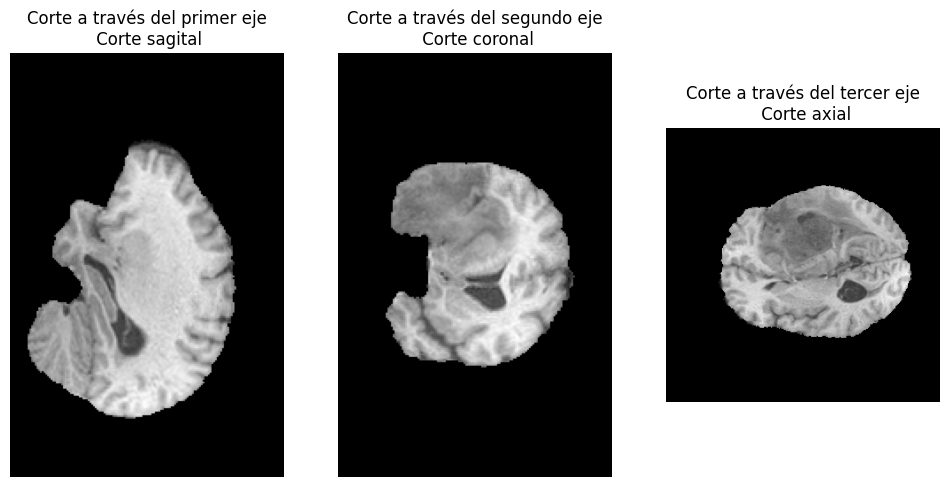

In [21]:
plt.figure(figsize=(12, 8))
plt.subplot(131)
img1,img2,img3 = extraccion_de_cortes(data_example,(150,100,70))
plt.title("Corte a través del primer eje\n Corte sagital")
plt.imshow(img1, cmap='gray')
plt.axis('Off')
plt.subplot(132)
plt.title("Corte a través del segundo eje\n Corte coronal")
plt.imshow(img2, cmap='gray')
plt.axis('Off')
plt.subplot(133)
plt.title("Corte a través del tercer eje\n Corte axial")
plt.imshow(img3, cmap='gray')
plt.axis('Off')

A continuación, se presenta una visualización de un mismo corte con distintos medios de contraste y su respectiva anotación de foma consecutiva. Puede cambiar los valores de las variables `patient` y `cut` para ver distintos cortes

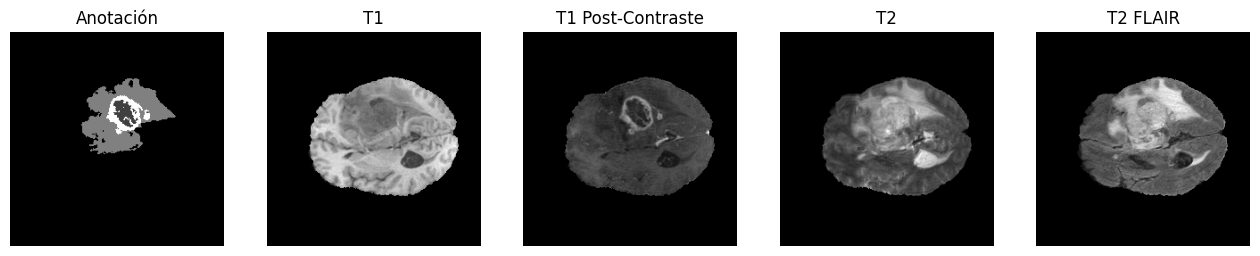

In [22]:
patient = 0
cut = 70

cut_images = [nii_seg[patient].get_fdata()[:, :, cut],
             nii_t1[patient].get_fdata()[:, :, cut],
             nii_t1ce[patient].get_fdata()[:, :, cut],
             nii_t2[patient].get_fdata()[:, :, cut],
             nii_flair[patient].get_fdata()[:, :, cut]]

titles = ["Anotación", "T1", "T1 Post-Contraste", "T2", "T2 FLAIR"]

plt.figure(figsize=(16,8))
for i in range(5):
    plt.subplot(1, 5, i+1)
    plt.imshow(cut_images[i], cmap = "gray")
    plt.title(titles[i])
    plt.axis('Off')


## Ejercicio 2:
Ahora que conocemos mejor como manejar elementos de 3 dimensiones, trabajemos un poco en la manipulación de estos. Cree una función que le entre por parametro un volumen y 3 tuplas. La función debe retornar un nuevo volumen que sea un recorte del original, las tuplas indicarán el voxel de inicio y el voxel final de cada dimensión.

>**Pista:** Para extraer elementos de un arreglo desde un numero hasta otro puede usar arreglo[a:b] donde "a" es el valor de inicio y "b" el valor final.

In [ ]:
def recorte_volumen(volumen,limites_sagital,limites_coronal,limites_axial):
    '''
    Volumen: El volumen del cual se van a extraer las imagenes.
    limites_sagintal: Tupla con 2 elementos, limites del volumen original en el eje sagital (dimension 0).
    limites_coronal: Tupla con 2 elementos, limites del volumen original en el eje coronal (dimension 1)
    limites_axial: Tupla con 2 elementos, limites del volumen original en el eje axial (dimension 2)
    '''
    i0, i1 = limites_sagital
    j0, j1 = limites_coronal
    k0, k1 = limites_axial

    new_volume = volumen[i0:i1, j0:j1, k0:k1]    
    
    return new_volume

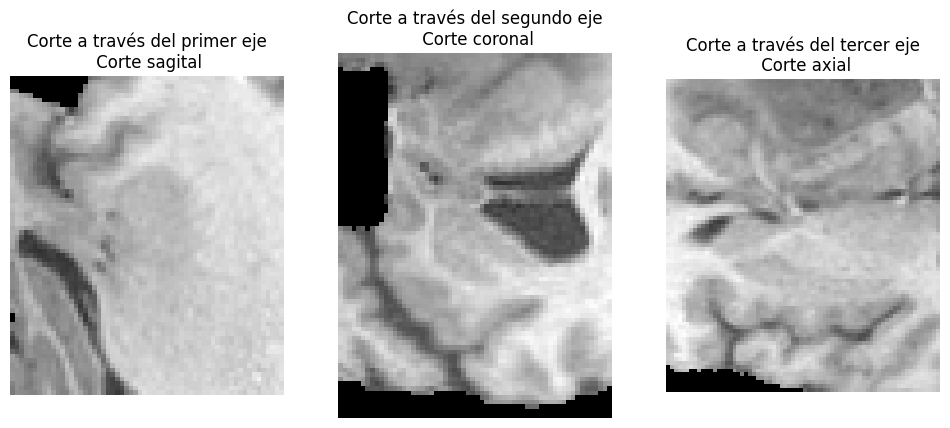

In [24]:
plt.figure(figsize=(12, 8))
plt.subplot(131)
new_volume = recorte_volumen(data_example,(100,180),(80,150),(40,100))
img1,img2,img3=extraccion_de_cortes(new_volume,(50,20,30))
plt.title("Corte a través del primer eje\n Corte sagital")
plt.imshow(img1, cmap='gray')
plt.axis('Off')
plt.subplot(132)
plt.title("Corte a través del segundo eje\n Corte coronal")
plt.imshow(img2, cmap='gray')
plt.axis('Off')
plt.subplot(133)
plt.title("Corte a través del tercer eje\n Corte axial")
plt.imshow(img3, cmap='gray')
plt.axis('Off')
plt.show()

a1,a2,a3=new_volume.shape

assert a1==80 and a2==70 and a3==60, f'El volumen de recorte debería tener dimensiones (80,70,60) y es {new_volume.shape}'
assert np.isclose(np.sum(new_volume[:,:,0]-data_example[100:180,80:150,40]),0), 'El volumen fue mal recortado en el eje axial'
assert np.isclose(np.sum(new_volume[:,0,:]-data_example[100:180,80,40:100]),0), 'El volumen fue mal recortado en el eje coronal'
assert np.isclose(np.sum(new_volume[0,:,:]-data_example[100,80:150,40:100]),0), 'El volumen fue mal recortado en el eje axial'

## Tercera parte: Representación estadística de la imagen

En esta tercera parte utilizaremos imágenes diferentes debido a que una particularidad de las imágenes médicas es que tienen mayoritariamente píxeles o vóxeles de fondo, es decir, píxeles o vóxeles negros. Como vimos anteriormente, los histogramas nos permiten representar la imagen de forma estadística. La utilidad de esta representación es que más fácil de entender para los computadores. Además, esta representación nos permite hacer transformaciones en las intensidades de las imágenes de una manera mucho más fácil.

Vamos a hacer un ejemplo, en las siguientes celdas. Para esto utilizaremos una imagen con poco contraste y lo que buscaremos es realizar una ecualización para aumentar su contraste.

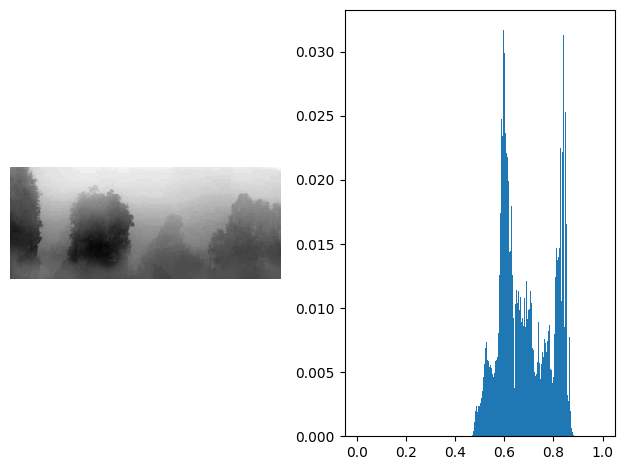

In [25]:
# Abrimos la imagen
img = imread("photo.jpg")

# Debido a que solo hemos aprendido a operar una imagen en escala de grises
# realizaremos la transformación a escala de grises
img = rgb2gray(img)

#Ahora veamos la imagen junto a su representación estadística
fig, ax = plt.subplots(1, 2)
ax[0].imshow(img, cmap = 'gray')
ax[0].axis('off')

# Utilizamos la siguiente función para hacer el histograma
counts, bins = np.histogram(img, bins = 256, range = (0, 1))
# Volvemos el histograma a un función de probabilidad
counts = counts / np.sum(counts)
# Mostramos el histograma
_ = ax[1].hist(bins[:-1], bins, weights=counts, range=(0, 1))

plt.tight_layout()

Ahora, utilice la función equalize_hist de skimage.exposure para realizar la ecualización de la imagen anterior. La documentación de la función la puede encontrar en el siguiente [enlace](https://scikit-image.org/docs/stable/api/skimage.exposure.html#skimage.exposure.equalize_hist).
>- Nota: Recuerde utilizar la mayor cantidad de bins posibles. Además, recuerde que las imágenes normalmente tienen 256 intensidades posibles.

In [26]:
equalize_img = equalize(img)

assert np.isclose(np.sum(equalize_img), 74709.181, 0.01), "No realizó correctamente la ecualización"
assert np.histogram(equalize_img, bins = 256, range = (0, 1))[0][0] == 487, "No realizó correctamente la ecualización"

#Ahora veamos la imagen junto a su representación estadística
fig, ax = plt.subplots(1, 2)
ax[0].imshow(equalize_img, cmap = 'gray')
ax[0].axis('off')

# Utilizamos la siguiente función para hacer el histograma
counts, bins = np.histogram(equalize_img, bins = 256, range = (0, 1))
# Volvemos el histograma a un función de probabilidad
counts = counts / np.sum(counts)
# Mostramos el histograma
_ = ax[1].hist(bins[:-1], bins, weights=counts, range=(0, 1))

plt.tight_layout()

NameError: name 'equalize' is not defined

## Créditos

**Referencias de las bases de datos:**

SIIM-FISABIO-RSNA COVID-19 Detection Challenge:

1. Vayá, M. de la I., Saborit, J. M., Montell, J. A., Pertusa, A., Bustos, A., Cazorla, M., Galant, J., Barber, X., Orozco-Beltrán, D., García-García, F., Caparrós, M., González, G., & Salinas, J. M. (2020). BIMCV COVID-19+: a large annotated dataset of RX and CT images from COVID-19 patients. https://arxiv.org/abs/2006.01174v3

BrATS 2020:

1. B. H. Menze, A. Jakab, S. Bauer, J. Kalpathy-Cramer, K. Farahani, J. Kirby, et al. "The Multimodal Brain Tumor Image Segmentation Benchmark (BRATS)", IEEE Transactions on Medical Imaging 34(10), 1993-2024 (2015) DOI: 10.1109/TMI.2014.2377694
1. S. Bakas, H. Akbari, A. Sotiras, M. Bilello, M. Rozycki, J.S. Kirby, et al., "Advancing The Cancer Genome Atlas glioma MRI collections with expert segmentation labels and radiomic features", Nature Scientific Data, 4:170117 (2017) DOI: 10.1038/sdata.2017.117
1. S. Bakas, M. Reyes, A. Jakab, S. Bauer, M. Rempfler, A. Crimi, et al., "Identifying the Best Machine Learning Algorithms for Brain Tumor Segmentation, Progression Assessment, and Overall Survival Prediction in the BRATS Challenge", arXiv preprint arXiv:1811.02629 (2018)


Danniel Moreno - Santiago Usma - Juan Lyons - Javier Vera - Felipe Escallón Páez - Jose Miguel Abril Nova